<h1><centre><br>GRADUATE ADMISSION</br></centre></h1>

In [1]:
from IPython.display import Image
Image(url="https://imgs.search.brave.com/O575PcfA0gxrhi-7xAalwxQljxwPnGhGJn-wAzQ7uRA/rs:fit:500:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/ZnJlZS1waG90by9n/cm91cC1kaXZlcnNl/LWdyYWRzLXRocm93/aW5nLWNhcHMtdXAt/c2t5XzUzODc2LTU2/MDMxLmpwZz9zaXpl/PTYyNiZleHQ9anBn", width=300, height=300)

<h3><br><j>A graduate application is to be completed by a student who wants to enroll in a Master's or doctoral degree. A graduate application will be reviewed by the department that the student applies to along with a Graduate Program Director and/or an admissions committee. So in this dataset we will predict the Graduate Admissions from an Indian perspective.</j></br></h3>



<h1><b>IMPORTING THE LIBRARIES</b></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1><b>LOADING THE DATASET</b></h1>

In [3]:
data=pd.read_csv('Admission_Predict_Ver1.1 (1).csv')

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data.value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit 
1           337        118          4                  4.5  4.5   9.65  1         0.92                1
330         297        96           2                  2.5  1.5   7.89  0         0.43                1
343         308        106          3                  3.0  3.0   8.24  0         0.58                1
342         326        110          3                  3.5  3.5   8.76  1         0.79                1
341         312        107          3                  3.0  3.0   8.46  1         0.75                1
                                                                                                     ..
162         298        99           1                  1.5  3.0   7.46  0         0.53                1
161         315        103          1                  1.5  2.0   7.86  0         0.57                1
160         297        100          1                  1.5  2.0   7.9

In [9]:
data.shape

(500, 9)

In [10]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

<b><br>By considering above output,we conclude that our dataset doesn't consist of any null values.</br></b>

<h1><b><br>EXPLORATORY DATA ANALYSIS</h1></b></br>

<b><br>HISTOGRAM</b></br>

<b><br>A histogram is basically used to represent data provided in the form of groups. It's accurate method for the graphical representation of numerical data distribution. It's a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.</b></br>

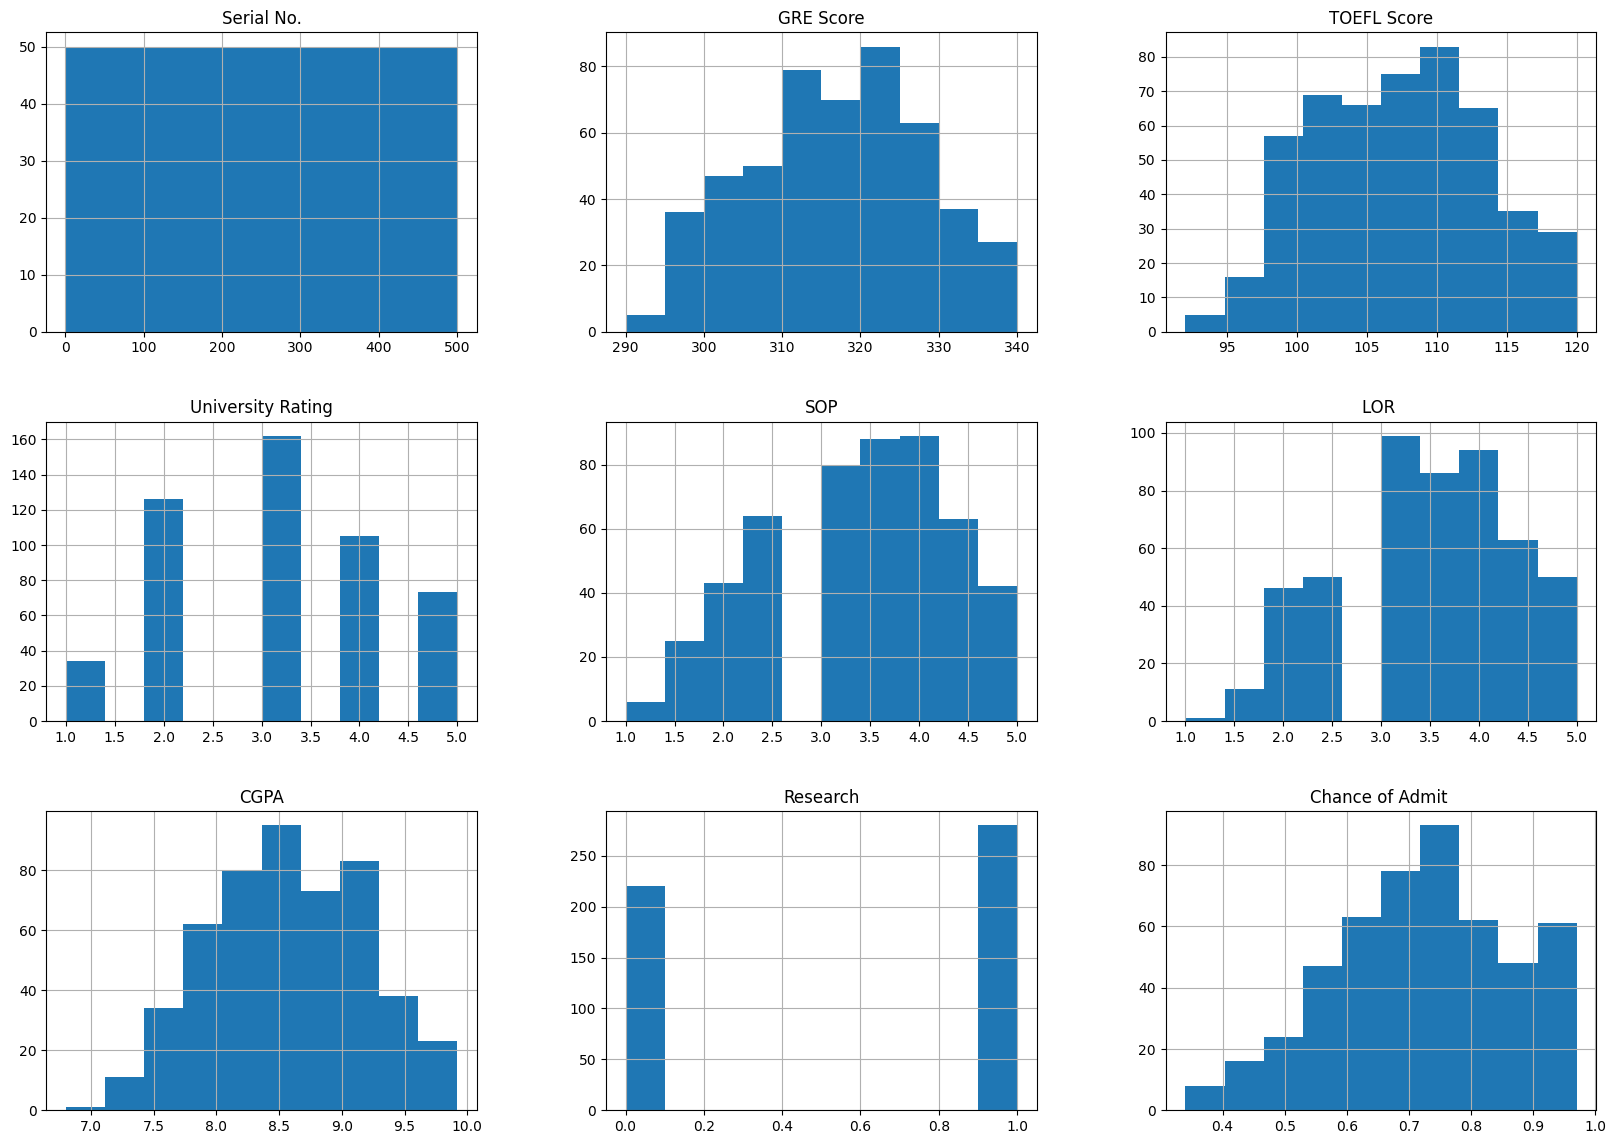

In [14]:
data.hist(figsize=(20,14))
plt.show()

<b>PAIRPLOT</b>

<b>A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.</b>

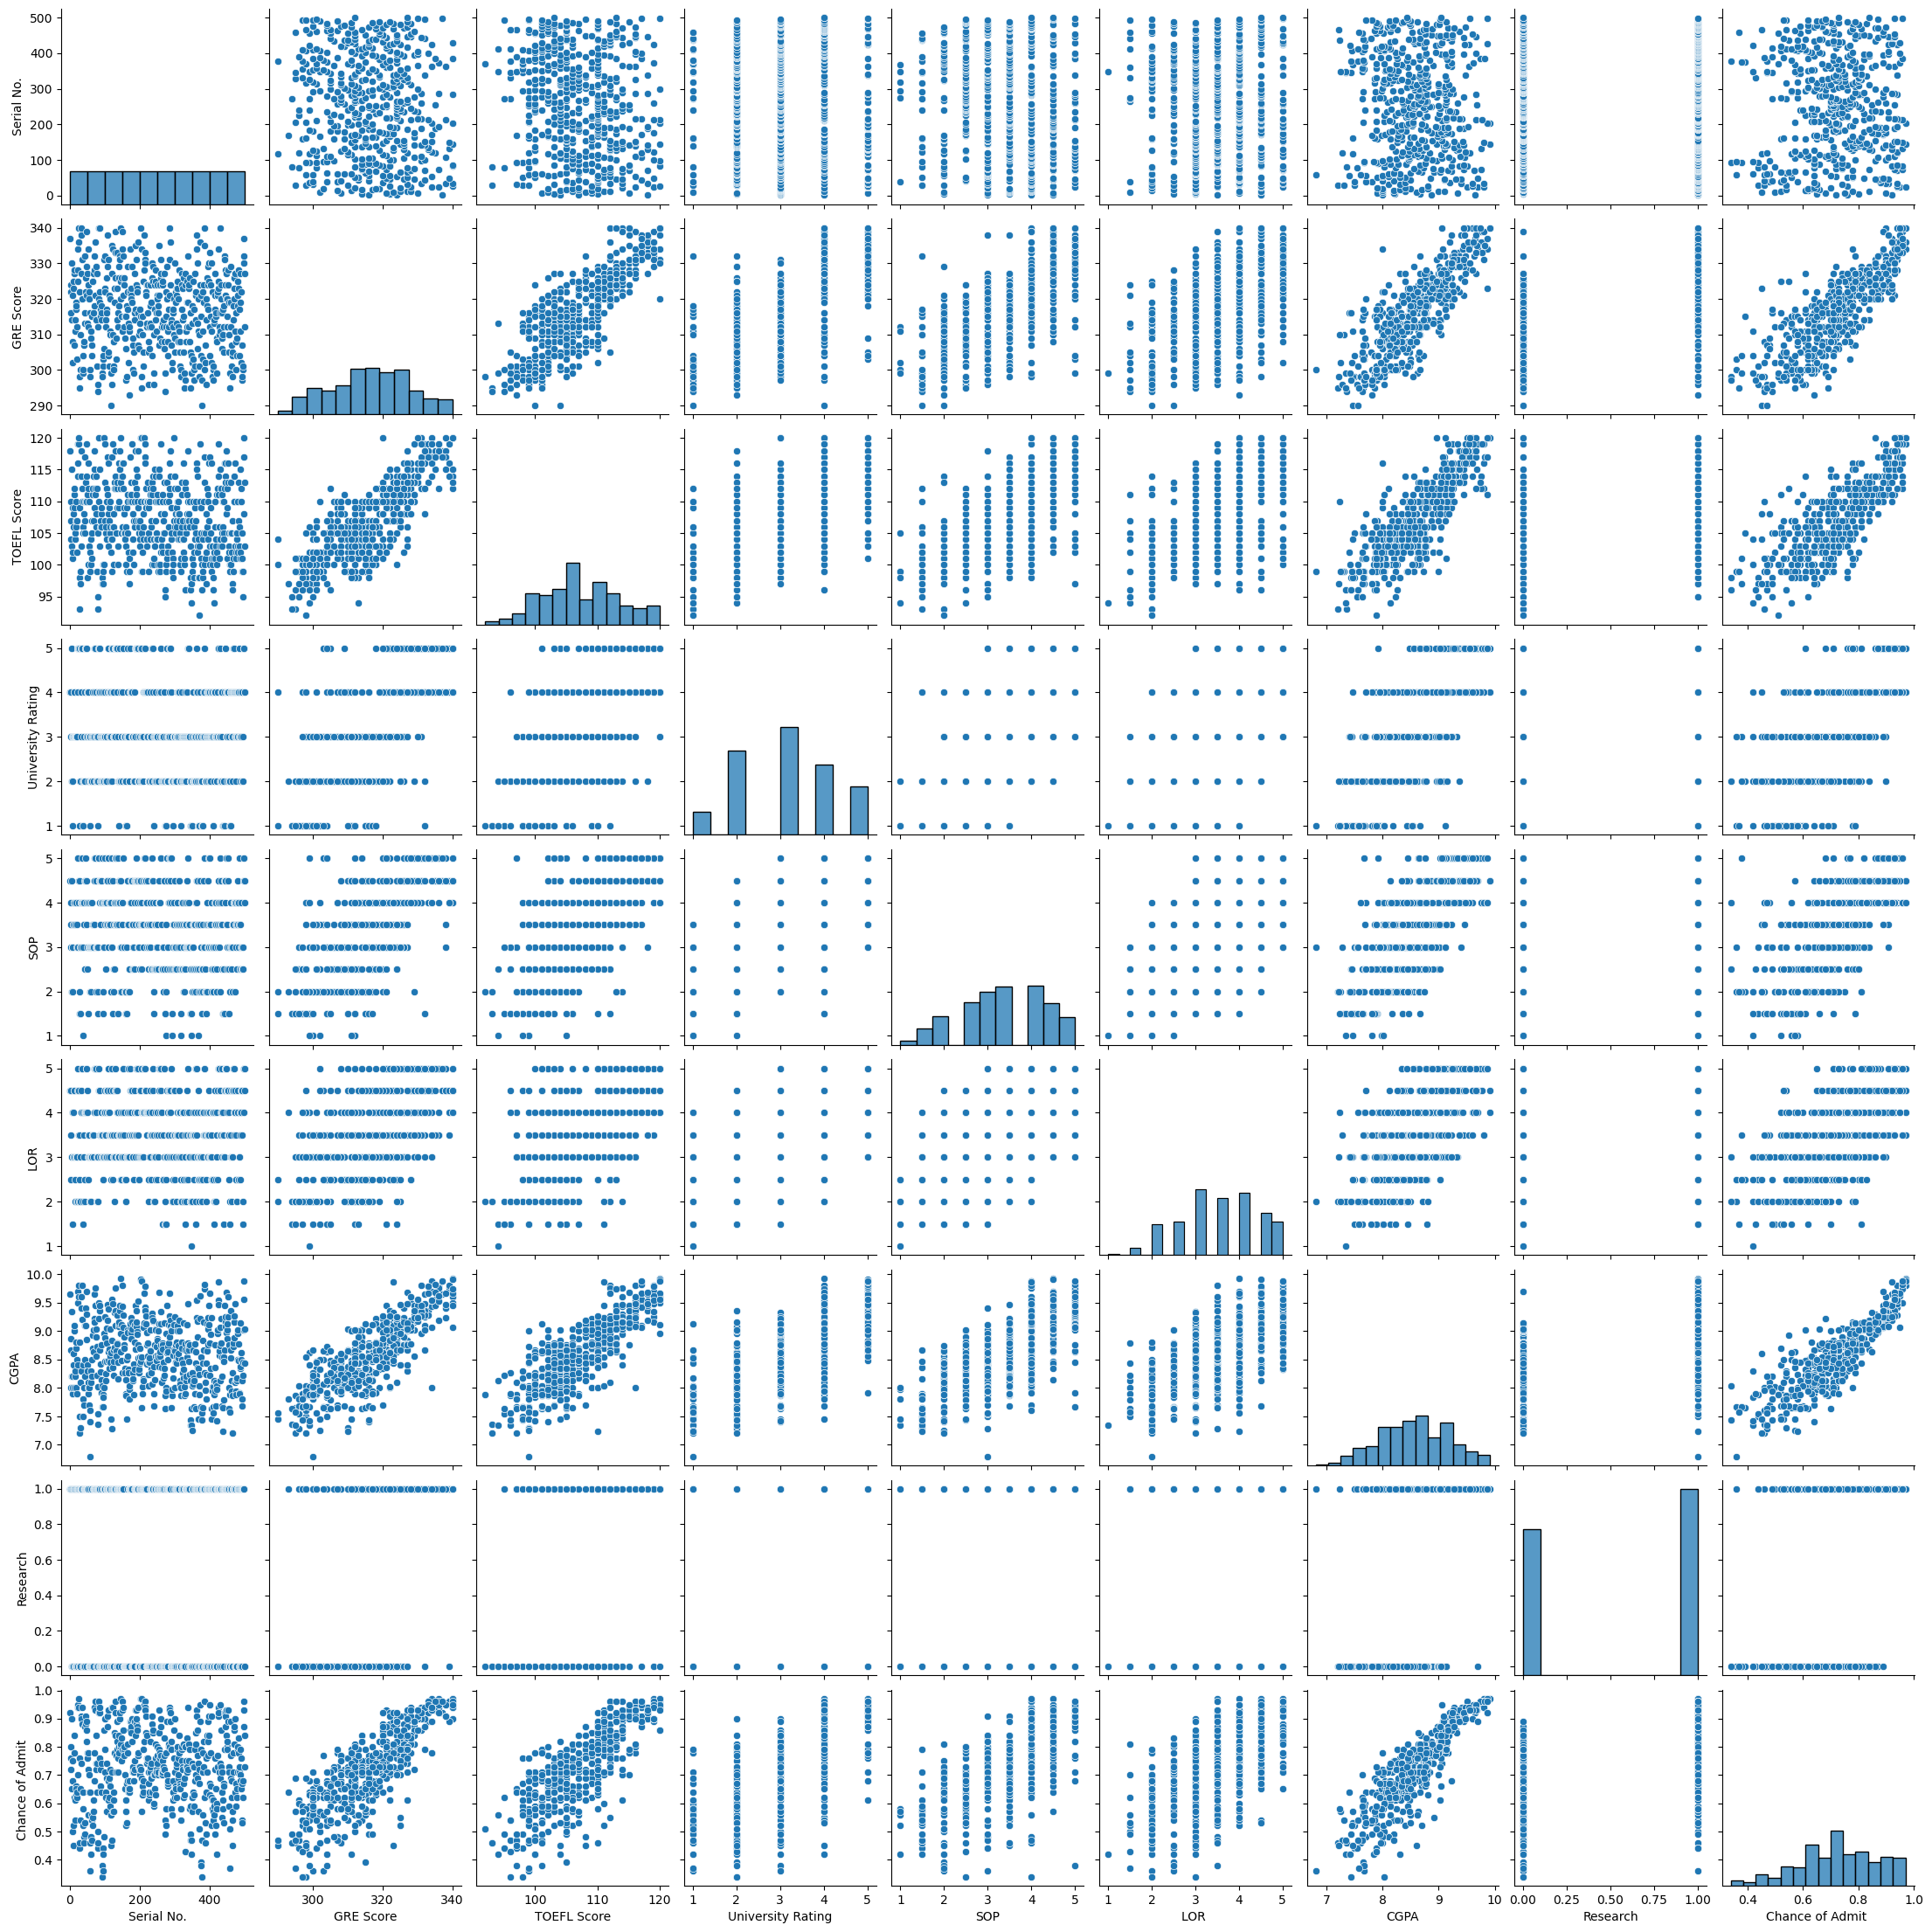

In [15]:
sns.pairplot(data=data)

In [16]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<b>HEATMAP</b>

<b> heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.</b>

<AxesSubplot:>

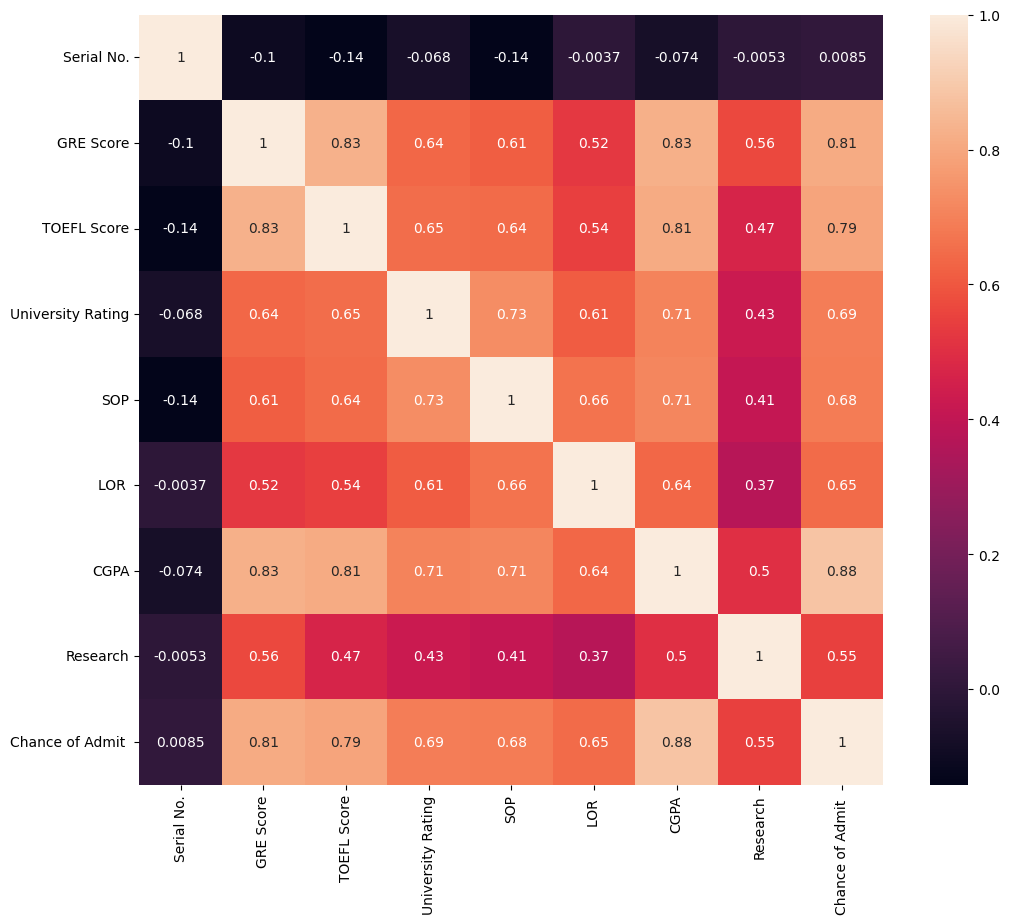

In [17]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

<b>SWARM PLOT</b>

<b>swarmplot() Draw a categorical scatterplot with non-overlapping points. A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.</b>

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

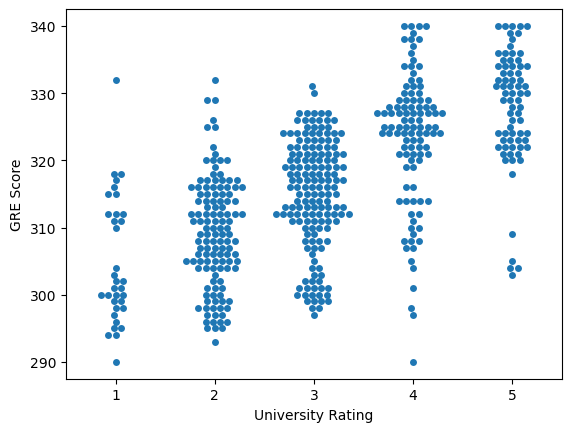

In [18]:
sns.swarmplot(x="University Rating", y="GRE Score", data=data)

<b>RELPLOT</b>

<b>The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)</b>

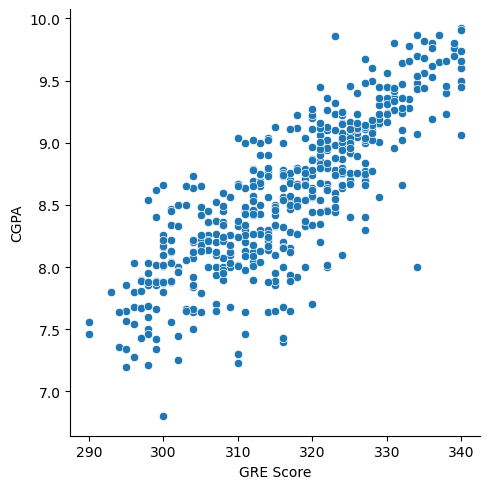

In [19]:
sns.relplot(x="GRE Score",y="CGPA",data=data)

<b>BOXPLOT</b>

<b>A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.</b>

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

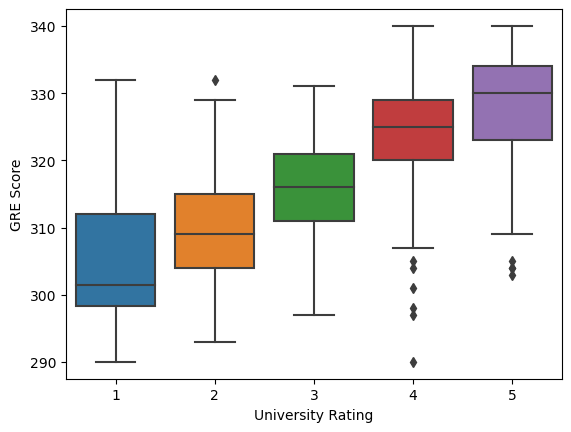

In [20]:
sns.boxplot(x="University Rating",y="GRE Score",data=data)

<b>REGPLOT</b>

<b>This method is used to plot data and a linear regression model fit. ... If strings, these should correspond with column names in “data”. When pandas objects are used, axes will be labeled with the series name. data: This is dataframe where each column is a variable and each row is an observation.</b>

<AxesSubplot:xlabel='TOEFL Score', ylabel='CGPA'>

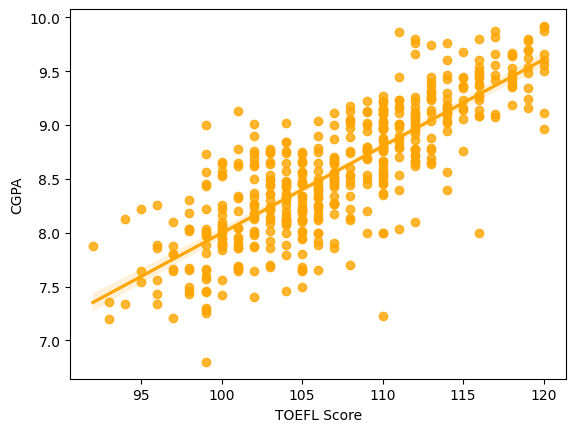

In [21]:
sns.regplot(x="TOEFL Score",y="CGPA",data=data,color='orange')

<b>VIOLIN PLOT</b>

<b>A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.</b>

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

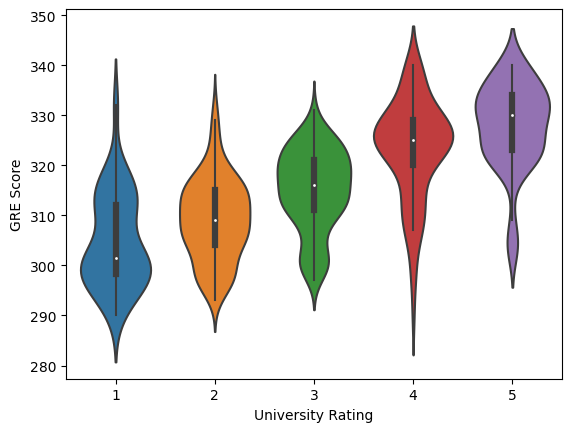

In [22]:
sns.violinplot(x="University Rating", y="GRE Score", data=data)

<b>LINEPLOT</b>

<b>A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.</b>

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

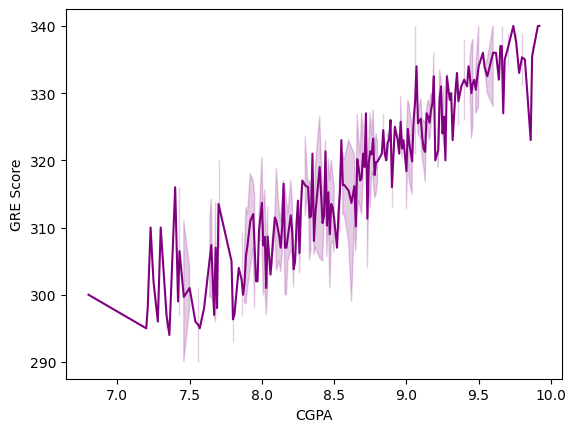

In [23]:
sns.lineplot(x="CGPA",y="GRE Score",data=data,color='purple')


<b>JOINTPLOT</b>

<b>Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.</b>

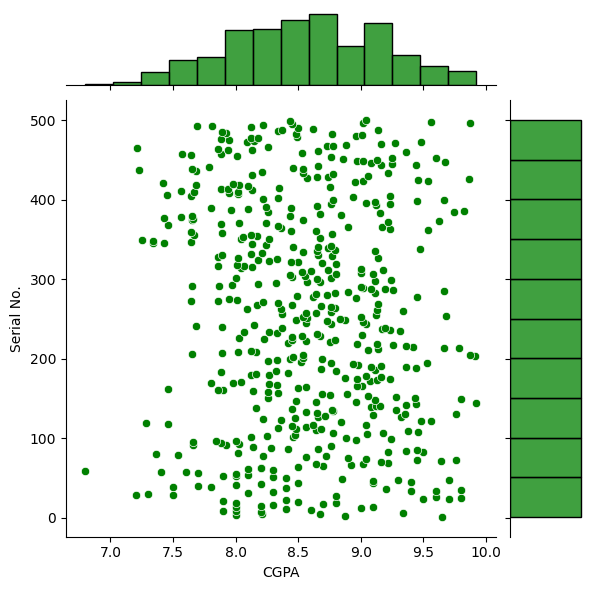

In [24]:
sns.jointplot(x="CGPA",y="Serial No.",data=data,color='g')

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

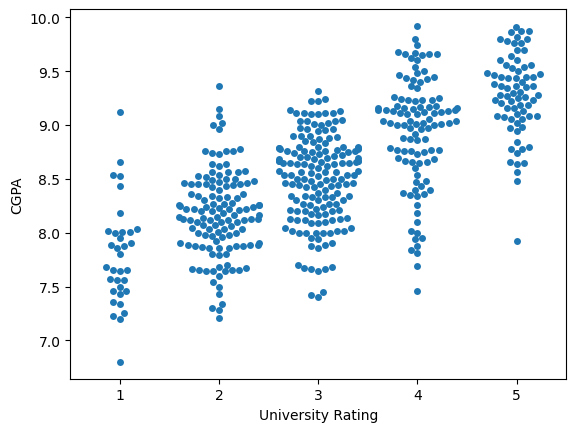

In [25]:
sns.swarmplot(x="University Rating",y="CGPA",data=data)

<b>BARPLOT</b>

<b>A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.</b>



<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

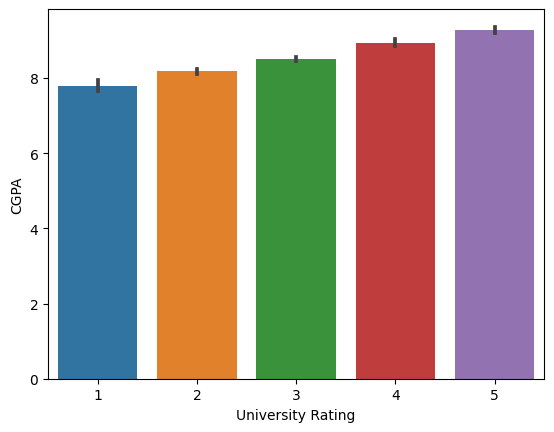

In [26]:
sns.barplot(x="University Rating",y="CGPA",data=data)


<AxesSubplot:xlabel='SOP', ylabel='GRE Score'>

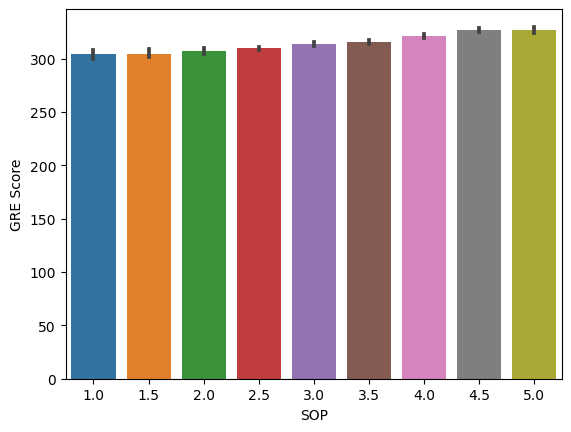

In [27]:
sns.barplot(x="SOP",y="GRE Score",data=data)


<b>SCATTER PLOT</b>

<b>A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.</b>

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

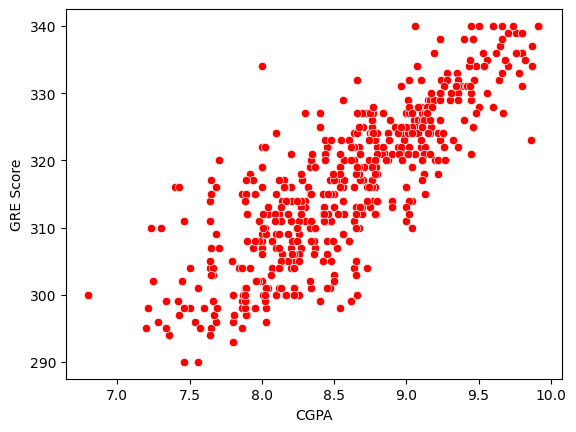

In [28]:
sns.scatterplot(x="CGPA",y="GRE Score",data=data,color='r')


In [29]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<b>KDE PLOT (DENSITY PLOT)</b>

<b>KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.</b>

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

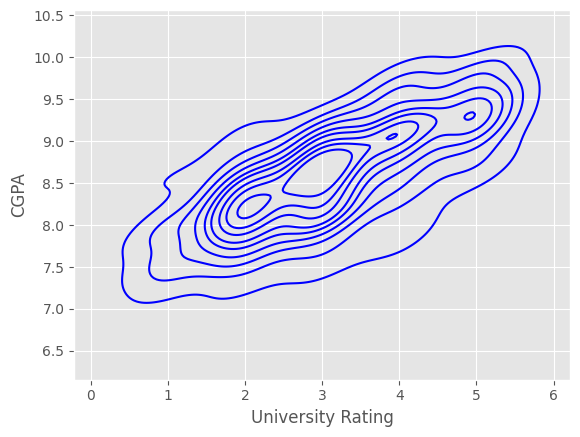

In [30]:
plt.style.use("ggplot")

sns.kdeplot(x="University Rating",y="CGPA",data=data,color='blue')

<h1><b><br>TRAINING AND TESTING DATA</br></b></h1>

In [31]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [33]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)
 

In [34]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

350
150
350
150


<h1><b>MODEL</b></h1>

<b>This is a Regression Problem so we will use regression models.</b>

<h2><b>LINEAR REGRESSION</h2></b>
<b>Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.<b>

In [35]:

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8469181513533821


In [37]:
lin_reg.intercept_

-1.3011215462692653

In [38]:
lin_reg.coef_

array([7.50417026e-05, 2.11774134e-03, 2.70657259e-03, 1.69987510e-03,
       5.89471089e-03, 1.55520281e-02, 1.10688846e-01, 2.97925641e-02])

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.00324027940812033

In [40]:
mean_absolute_error(y_test,y_pred)

0.039665240921823

In [41]:
model = LinearRegression()
model.fit(x_test, y_test)
model.score(x_test, y_test)*100

86.42420312890093

<b><br>RIDGE REGRESSION</b></br>
<b>Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.</b>

In [42]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
Ridge()

Ridge()

In [43]:
y_pred = rid.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.8465767651208996


In [44]:
rid.coef_

array([7.58427506e-05, 2.19444061e-03, 2.82864742e-03, 1.96554897e-03,
       6.23824769e-03, 1.58525510e-02, 1.06727132e-01, 2.94712263e-02])

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.0032475055213996534

In [46]:
rid.score(x_test, y_test)*100

84.65767651208996

<b><br>LASSO REGRESSION</br></b>
<b>Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).</b>

In [47]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
Lasso()

Lasso()

In [48]:
y_pred = las.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.23457305296621633


In [49]:
las.coef_

array([0.        , 0.00198565, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [50]:

from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.016201771776478847

In [51]:
las.score(x_test, y_test)*100

23.457305296621634

<b><br>LEAST ANGLE REGRESSION</br></b>
<b>In statistics, least-angle regression is an algorithm for fitting linear regression models to high-dimensional data. LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients. Lasso model fit with Least Angle Regression a.k.a. Lars.</b>

In [52]:
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score

In [53]:
regressor = LassoLars(alpha = 0.1)
regressor.fit(x_train, y_train)

LassoLars(alpha=0.1)

In [54]:
regressor.intercept_

-2.0626771377180386

In [55]:
regressor.coef_

array([8.35604400e-05, 7.18447483e-03, 4.58687339e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [56]:
y_pred = regressor.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.7173615016351129


In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)

0.005982601557862943

In [58]:
mean_absolute_error(y_test,y_pred)

0.059513249598502564

<h1><b><br>CONCLUSION :</br></b></h1>
<b>We got a accuracy of about 87% using Linear Regression and 85% using Ridge Regression.</b>
<br><b>The accuracy of other models can be increased by HyperTuning.</b></br>

